<a href="https://colab.research.google.com/github/dhtmddms/google_drive/blob/main/machine_learning_book/PCA_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석 (PCA)
- 차원축소의 개념
- 차원축소는 왜 하는가?
  + 예) 외출활동이 좋은지 안 좋은지 분류하는 머신러닝 모델
  + 날씨 데이터 확보했음 - 풍속, 온도, 습도, 강수량 등등
  + 이러한 많은 요인들을 독립변수 or 피쳐(Feature)라고 함
  + 모든 피쳐들을 그대로 학습 모델에 입력하면 '다중 공산성 문제' 발생
    + 다중 공산성이란 ? 피쳐들끼리 강한 상관관계가 나타남을 의미 -> 이는 결국 모델의 과적합을 발생시킴
- 따라 어떤 피쳐가 모델의 성능에 큰 영향을 줄지 파악하여 피쳐를 선택/가공하는 과정을 겨쳐야 함
- PCA는 피쳐를 선택하는 것이 아니라, 더 작은 차원으로 피쳐들을 맵핑하는 것
 + 300차원의 데이터 테이블을 50차원으로 압축하는 과정!

- PCA는 단순히 피쳐들을 빼는게 아니라 여러개의 피쳐들이 갖는 정보를 하나로 압축하는 것

출처: https://huidea.tistory.com/44


## 프로세스
- 만약 300차원의 데이터를 k 차원으로 줄이고자 한다
  + 입력 데이터의 공분산 행렬을 구한다
  + 공분산 행렬을 고유값 분해해서 고유벡터와 고유 값을 구한다 (-> 분산이 가장 큰 방향을 가진 화살표를 찾는다)
  + 고유값이 가장 큰 (화살표 길이가 가장 긴) k개의 고유 벡터를 추출 
  + 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 입력 데이터들을 선형 변환

# 코드 실습

## 데이터 준비

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-03-31 08:00:52--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-03-31 08:00:52--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-03-31 08:00:53--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

- 배열로 업로드

In [ ]:
import numpy as np
fruits = np.load("fruits_300.npy")
fruits_2d = fruits.reshape(-1,100*100)

- n_components 매개변수에 주성분 개수를 지정

In [ ]:
from sklearn.decomposition import PCA
pca= PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
print(pca.components_.shape)

(50, 10000)


- n_components=50으로 지정한 결과 pca.components_배열의 첫번째 차원이 50으로 됨

- 그래프 그리기

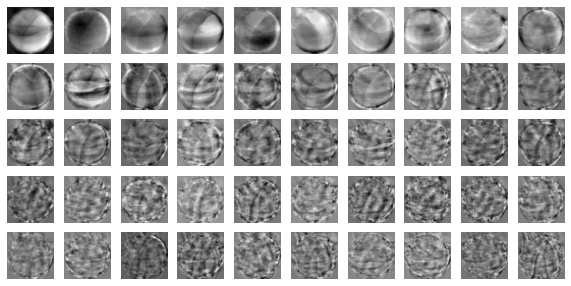

In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
print(fruits_2d.shape)

(300, 10000)


- transform() 메서드를 사용하여 원본데이터의 차원을 50으로 줄이기

In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


- (300, 10000) 크기의 배열이던 fruits_2d를 pca 모델을 사용해 (300, 50) 크기의 배열로 변환함
- 이제 fruits_pca 배열은 50개의 특성을 가진 데이터가 되었음 -> 공간 단축 성공!

# 원본 데이터 재구성

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


- 100x100 크기로 바꾼 다음 100개씩 나누어 출력

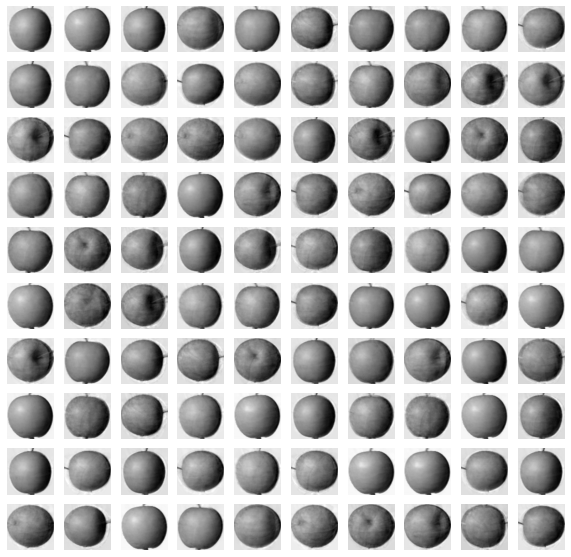

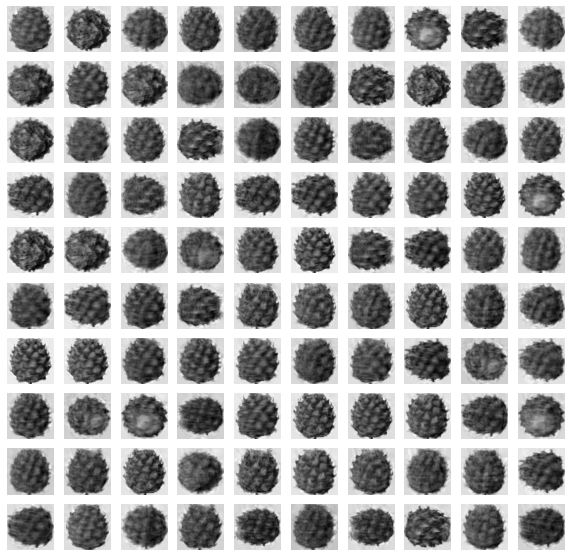

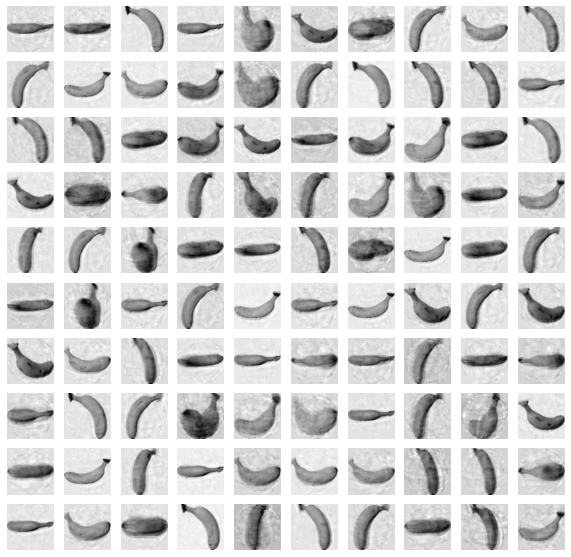

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start + 100])
  print("\n") # 줄을 바꾸기 위한 이스케이프 코드: \n

- 거의 모든 과일이 잘 복원된 것을 확인

# 설명된 분산
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지를 기록한 값

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9215624654933283


- 92%가 넘는 분산을 유지하고 있었음, 50개의 특성에서 원본 데이터를 복원했을 때 이미지의 품질이 높았던 이유임

- 설명된 분산의 비율을 그래프로 그리기 -> 적절한 주성분의 개수를 찾는데 도움

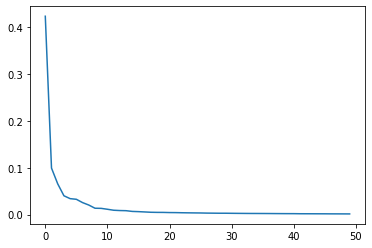

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

- 처음 10개의 주성분이 대부분의 분산을 표현하고 있음을 확인
- 10 다음부터는 각 주성분이 설명하고 있는 분산은 비교적 작음

# 다른 알고리즘과 함께 사용하기
- 3개의 과일사진 분류를 위해 로지스틱 회귀 모델 사용

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# 타깃값 생성
target = np.array([0]*100 + [1]*100 + [2]*100)

- 로지스틱 회귀 모델에서 성능을 가늠해보기 위해 교차 검증 진행

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr,fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.5373713493347168


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.027069520950317384


- 50개의 특성만 사용한 fruits_pca가 정확도도 더 높고 시간도 단축됨